<a href="https://colab.research.google.com/github/yashasangani/Projects/blob/main/Gradient_descent_Combined_Cycle_Power_Plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Gradient_descent_Combined_Cycle_Power_Plant Project


#Problem statement
Combined Cycle Power Plant dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
You are given:
1. A Readme file for more details on dataset.
2. A Training dataset csv file with X train and Y train data
3. A X test File and you have to predict and submit predictions for this file.
Your task is to:
1. Code Gradient Descent for N features and come with predictions.
2. Try and test with various combinations of learning rates and number of iterations.
3. Try using Feature Scaling, and see if it helps you in getting better results.
Read Instructions carefully -
1. Use Gradient Descent as a training algorithm and submit results predicted.
2. Files are in csv format, you can use genfromtxt function in numpy to load data from csv file. Similarly you can use savetxt function to save data into a file.
3. Submit a csv file with only predictions for X test data. File should not have any headers and should only have one column i.e. predictions. Also predictions shouldn't be in exponential form.
4. Your score is based on coefficient of determination. So it can be possible that nobody gets full score.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.

Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.


In [24]:
from warnings import filterwarnings
filterwarnings("ignore")

In [25]:
import pandas as pd
import numpy as np

In [26]:
dtrain = pd.read_csv("https://raw.githubusercontent.com/yashasangani/Datasets/main/GD_Combined_Cycle_Power_Plant_training_ccpp_x_y_train.csv",delimiter=",")

In [27]:
dtrain.shape


(7176, 5)

In [28]:
dtest =  pd.read_csv("https://raw.githubusercontent.com/yashasangani/Datasets/main/GD_Combined_Cycle_Power_Plant_test_ccpp_x_test.csv",delimiter=",",header = None)

In [29]:
dtest.shape

(2392, 4)

In [30]:
x_train=dtrain.iloc[:,0:4]
y_train=dtrain.iloc[:,4]
y_train.shape

(7176,)

# Feature scaling of training and testing datasets

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(dtest)

# code for Gradient Descent

In [32]:
def gradient_descent(x,y,iterations,learning_rate):
  m = np.zeros(x.shape[1])
  c = 0
  n = len(x)
  li = []
  m1=[]
  c1=[]
  for i in range(iterations):
    md = (-2/n)*(((y - (x*m).sum(axis=1) - c).values.reshape(-1, 1))*x).sum(axis=0)
    cd = (-2/n)*(((y - (x*m).sum(axis=1)-c).values.reshape(-1, 1))).sum(axis=0)
    m = m - learning_rate * md
    c = c - learning_rate * cd
    print("iterations =", i ,"cost = ",cost_function(x,y,iterations,m,c))
    li.append(cost_function(x,y,iterations,m,c))
    m1.append(m[0])
    c1.append(c[0])

  return m,c,li,m1,c1


In [33]:
def cost_function(x,y,iterations,m,c):
  for i in range(iterations):
    cost = ((y - (x*m).sum(axis=1)-c) ** 2).mean()
    return cost



def run(x,y):
  m = np.zeros(x.shape[1])
  c =0
  n = len(x)
  learning_rate = 0.009
  iterations = 1000

  m,c,li,m1,c1 = gradient_descent(x,y,iterations,learning_rate)
  return m[0:13],c,li,m1,c1



In [34]:
m,c,li,m1,c1 = run(x_train,y_train)
print(f"m = {m[0:13]} \nc = {c} \nli = {li} \nm1 = {m1} \nc1 = {c1}")



iterations = 0 cost =  199412.47101703772
iterations = 1 cost =  192288.25382909414
iterations = 2 cost =  185419.16753503523
iterations = 3 cost =  178796.02639587462
iterations = 4 cost =  172409.9795945554
iterations = 5 cost =  166252.4986662935
iterations = 6 cost =  160315.3654308211
iterations = 7 cost =  154590.66040402013
iterations = 8 cost =  149070.7516676379
iterations = 9 cost =  143748.28417689615
iterations = 10 cost =  138616.1694868597
iterations = 11 cost =  133667.57587941192
iterations = 12 cost =  128895.91887361213
iterations = 13 cost =  124294.85210307455
iterations = 14 cost =  119858.25854482387
iterations = 15 cost =  115580.24208484891
iterations = 16 cost =  111455.11940629403
iterations = 17 cost =  107477.41218690801
iterations = 18 cost =  103641.83959300685
iterations = 19 cost =  99943.31105780951
iterations = 20 cost =  96376.91933257342
iterations = 21 cost =  92937.93379949198
iterations = 22 cost =  89621.79403582259
iterations = 23 cost =  86424.

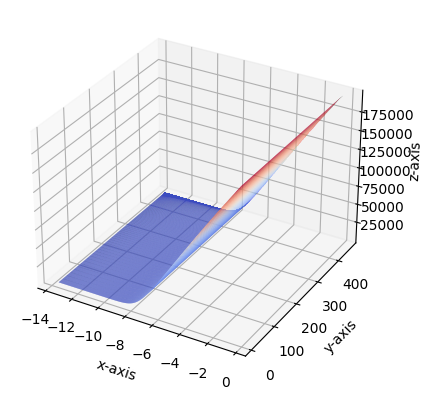

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax = plt.axes(projection='3d')   # Create the axes

# Data
X = np.array(m1)
Y = np.array(c1)
X, Y = np.meshgrid(X, Y)
Z = np.array([li])

# Plot the 3d surface
surface = ax.plot_surface(X, Y, Z,
                          cmap=cm.coolwarm,
                          rstride = 2,
                          cstride = 2)

# Set some labels
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.show()


In [36]:
def predict(x_train,m,c):
    n=len(x_train)
    y_pred=np.zeros(n)
    for i in range(n):
        X=x_train[i,:]
        y_pred[i]=(m*X).sum()+c

    return y_pred


In [37]:
y_pred = predict(x_train,m,c)

In [38]:
y_pred.mean(),y_train.mean()

(454.4312873252555, 454.4312931995541)

In [39]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_train,y_pred)
MSE

21.190753375419305


### By using above code, we will predict the result of testing data set.
test data is already scaled (x_test)

In [40]:
def predict(x,m,c):
    n=len(x)
    y_pred=np.zeros(n)
    for i in range(n):
        X=x[i,:]
        y_pred[i]=(m*X).sum()+c

    return y_pred


y_predict =predict(x_test,m,c)


data = pd.DataFrame(y_predict)
data

,0
0,470.226718
1,471.878275
2,433.425441
3,457.867374
4,465.213614
...,...
2387,433.656060
2388,440.028132
2389,439.416619
2390,451.968292


In [41]:
pd.DataFrame(y_predict).to_csv('CCPP_predictions.csv', header=False, index=False, float_format='%.5f')
